In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

### Projekto tikslas:

*Šio projekto tikslas – išanalizuoti medienos aukcionų duomenis, prognozuoti medienos kainas ir klasifikuoti medienos rūšis naudojant konvoliucinius neuroninius tinklus (CNN).*

*Pirmojoje projekto dalyje buvo atlikta duomenų analizė, siekiant nustatyti kainų tendencijas ir susieti jas su įvairiais faktoriais, turinčiais įtakos aukcionų rezultatams.*

*Remiantis pirmos dalies duomenimis, antroje projekto dalyje buvo sukurta prognozavimo sistema, kurios tikslas – nuspėti medienos kainą pagal istorinius duomenis.*

*Trečiasis projekto etapas apima CNN (Convolutional Neural Network) modelio sukūrimą, kuris yra specializuotas įvaizdžių atpažinimui ir klasifikavimui. Šiame etape modelis buvo apmokytas medžio nuotraukomis, kurios priklauso penkioms skirtingoms medienos rūšims. Tikslas – sukurti modelį, kuris pagal pateiktą naują medžio nuotrauką galėtų tiksliai atpažinti ir priskirti ją vienai iš penkių rūšių.*

#### Įkeliama Excel lentelė, kuri buvo sujungta iš medienos aukcionų pateiktų duomenų 2020, 2021 ir 2022 metais. Ši lentelė apima išsamias aukcionų detales, tokias kaip medienos tipai, kainos, pirkėjai, pardavėjai ir kiti svarbūs parametrai, kurie buvo apdoroti ir susisteminti ankstesniuose etapuose.

*Oficialus duomenų šaltinis  - https://www.baltpool.eu/medienos-birza/*


In [2]:
df = pd.read_excel(r"C:\Mokymu_medziaga\Mano projektas\My_project\df_aukcionai_2020_2021_2022.xlsx")
df.head()

,Sutarties nr.,Pardavėjas,Pirkėjas,Trukmė,Sortimento pavadinimas,Rušies pavadinimas,Kokybės klasė,Stambumo klasė,"Ilgio klase,m","Kaina aukcione, Eur","Sandorio kiekis, m3",Aukciono metai
0,512100000157-P,VĮ Anykščių miškų urėdija,"""Aukštaitijos mediena"", D. Arlausko IĮ",Pusmetinė,Pjautinieji rąstai,Drebulė,B/C,Vd 20-31,L3: 4.0-6.0,105,40,2022
1,512000000213-I,VĮ Anykščių miškų urėdija,"""Aukštaitijos mediena"", D. Arlausko IĮ",Ilgalaikė,Plokščių mediena,Lapuočiai,E,Sm 19,L1: 2.4-3.0,"14,66",2500,2022
2,512000000213-I,VĮ Anykščių miškų urėdija,"""Aukštaitijos mediena"", D. Arlausko IĮ",Ilgalaikė,Plokščių mediena,Lapuočiai,E,Sm 19,L1: 2.4-3.0,"14,66",2500,2022
3,512000000213-I,VĮ Anykščių miškų urėdija,"""Aukštaitijos mediena"", D. Arlausko IĮ",Ilgalaikė,Plokščių mediena,Lapuočiai,E,Sm 19,L1: 2.4-3.0,"14,66",2500,2022
4,512000000233-P,VĮ Anykščių miškų urėdija,"""Aukštaitijos mediena"", D. Arlausko IĮ",Pusmetinė,Plokščių mediena,Lapuočiai,E,Sm 19,L2: 3.0-3.9,"15,2",200,2021


#### Terminai ir apibrėžimai:

- *Apvalioji mediena – nukirstas ir nugenėtas medis be viršūnės, kuris gali būti skersai supjaustytas arba ne.*
- *Sortimentas – nustatytos paskirties apvalioji mediena.*
- *Popiermedis – apvalioji mediena, skirta mechaniniam ir galbūt cheminiam perdirbimui, gaminant plaušieną ar medienos plokštes.*
- *Plokščių mediena – apvalioji mediena plokštėms gaminti.*
- *Tarmedis – rąstas tarai gaminti.*
- *Kietųjų lapuočių mediena – ąžuolo, uosio, klevo, skroblo, guobinių mediena.*
- *Minkštųjų lapuočių mediena – tuopos (drebulės), beržo, gluosnio, liepos, alksnių mediena.*
- *Informacijos šaltinis: https://e-seimas.lrs.lt/portal/legalAct/lt/TAD/TAIS.143605?jfwid=i3h7wn0kr*

#### Patikrinami lentelės duomenys, ar tinkami tipai, ar nėra nulinių reikšmių ir neteisingai nuskaitomų duomenų

In [3]:
df.shape

(117634, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117634 entries, 0 to 117633
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Sutarties nr.           117634 non-null  object
 1   Pardavėjas              117634 non-null  object
 2   Pirkėjas                117634 non-null  object
 3   Trukmė                  117634 non-null  object
 4   Sortimento pavadinimas  117634 non-null  object
 5   Rušies pavadinimas      117634 non-null  object
 6   Kokybės klasė           117634 non-null  object
 7   Stambumo klasė          117634 non-null  object
 8   Ilgio klase,m           117634 non-null  object
 9   Kaina aukcione, Eur     117634 non-null  object
 10  Sandorio kiekis, m3     117634 non-null  object
 11  Aukciono metai          117634 non-null  int64 
dtypes: int64(1), object(11)
memory usage: 10.8+ MB


#### Pašalinamos nereikalingos simbolių klaidos ir neteisingos reikšmės. Atliekamas konvertavimas į skaitinį tipą.

*Išsaugoma naujas Excel failas su pakeitimais, kad ateityje nereikėtų vėl atlikti tų pačių duomenų apdorojimo veiksmų*

In [5]:
df["Kaina aukcione, Eur"] = df["Kaina aukcione, Eur"].str.replace(" ", "").str.replace(",", ".")
df["Sandorio kiekis, m3"] = df["Sandorio kiekis, m3"].str.replace(" ", "").str.replace(",", ".")

In [6]:
df["Sandorio kiekis, m3"] = pd.to_numeric(df["Sandorio kiekis, m3"], errors="coerce")
df["Kaina aukcione, Eur"] = pd.to_numeric(df["Kaina aukcione, Eur"], errors="coerce")
df["Sandorio kiekis, m3"] = df["Sandorio kiekis, m3"].fillna(0).astype(int)

df1 = df.copy()
df1.to_excel("df_aukcionai_2020_2021_2022_new.xlsx", index=False)

#### Peržiūrima pagrindinė statistika apie skaitinius duomenis duomenų lentelėje 

*Tai leidžia greitai apžvelgti duomenis ir įvertinti jų pagrindines savybes*

In [7]:
df.describe()

,"Kaina aukcione, Eur","Sandorio kiekis, m3",Aukciono metai
count,117634.000000,117634.000000,117634.000000
mean,61.843052,638.557432,2020.987733
std,31.447881,826.587866,0.815816
min,12.070000,1.000000,2020.000000
25%,46.730000,150.000000,2020.000000
50%,61.290000,340.000000,2021.000000
75%,72.700000,800.000000,2022.000000
max,682.300000,9600.000000,2022.000000


*Patikrinama kokie duomenų tipai yra priskirti kiekvienam stulpeliui po pakeitimų*

In [9]:
print(df.dtypes)

Sutarties nr.              object
Pardavėjas                 object
Pirkėjas                   object
Trukmė                     object
Sortimento pavadinimas     object
Rušies pavadinimas         object
Kokybės klasė              object
Stambumo klasė             object
Ilgio klase,m              object
Kaina aukcione, Eur       float64
Sandorio kiekis, m3         int32
Aukciono metai              int64
dtype: object


## Duomenų Analizė

#### Sandorių kiekio pasiskirstymas pagal metus ir sortimentą


In [10]:
sortimentas_pagal_metus = df.groupby(
    ["Sortimento pavadinimas", "Aukciono metai"]
)["Sandorio kiekis, m3"].sum().reset_index()

sortimentas_pagal_metus["Sandorio kiekis, m3"] /= 1000  

sortimentas_pagal_metus.rename(
    columns={"Sandorio kiekis, m3": "Sandorio kiekis, m3(tūkstančiais)"},
    inplace=True
)

sortimentas_pagal_metus.head()

,Sortimento pavadinimas,Aukciono metai,"Sandorio kiekis, m3(tūkstančiais)"
0,Pjautinieji rąstai,2020,17785.135
1,Pjautinieji rąstai,2021,17649.611
2,Pjautinieji rąstai,2022,17396.548
3,Plokščių mediena,2020,2136.277
4,Plokščių mediena,2021,2335.481


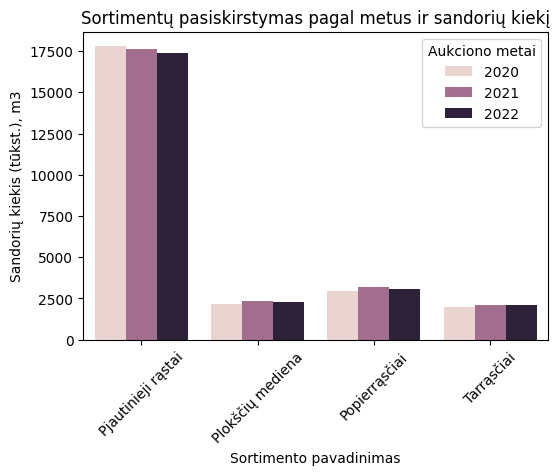

In [11]:
plt.figure(figsize=(6, 4))
sns.barplot(
    x="Sortimento pavadinimas", 
    y="Sandorio kiekis, m3(tūkstančiais)", 
    data=sortimentas_pagal_metus, 
    hue="Aukciono metai"
)
plt.title("Sortimentų pasiskirstymas pagal metus ir sandorių kiekį")
plt.ylabel("Sandorių kiekis (tūkst.), m3")
plt.xticks(rotation=45)
plt.show()

*Iš šios vizualizacijos matome, kad pjautinių rąstų sandorių kiekis yra ženkliai didesnis nei kitų sortimentų kiekvienais metais. Tai rodo, kad pjautinieji rąstai yra dominuojantis produktas rinkoje, o jų paklausa yra didžiausia, lyginant su kitais sortimentais.Tai nurodo jų svarbą rinkoje.*

*Tačiau sandorių kiekio pokytis kiekviename sortimente per trejus metus nėra reikšmingas, kas rodo, kad šiems produktams yra būdinga stabili paklausa. Nors pastebėti nedideli metiniai svyravimai, jie nėra pakankamai reikšmingi, kad sukeltų esminius rinkos pokyčius. Tai reiškia, kad tiek Pjautiniai rąstai, tiek Plokščių mediena, Popierrąsčiai ir Tarrąsčiai išlieka paklausūs produktai su pastoviu poreikiu rinkoje.*

#### Kainų pasiskirstymas pagal sortimentą

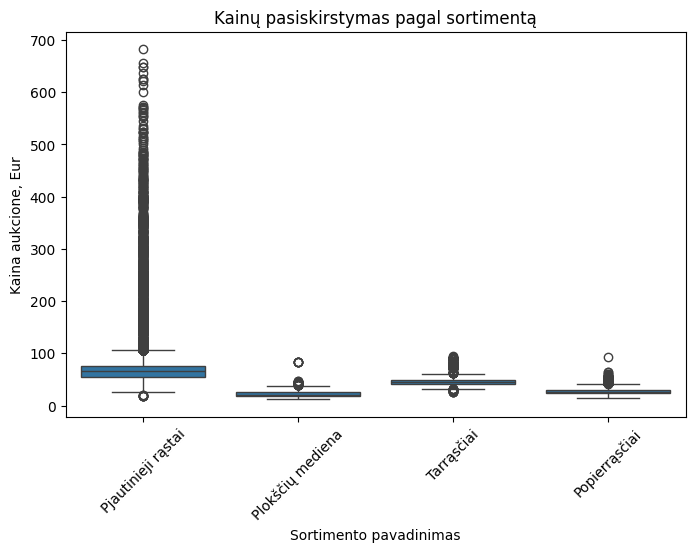

In [12]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="Sortimento pavadinimas", y="Kaina aukcione, Eur", data=df)
plt.title("Kainų pasiskirstymas pagal sortimentą")
plt.xlabel("Sortimento pavadinimas")
plt.ylabel("Kaina aukcione, Eur")
plt.xticks(rotation=45)
plt.show()


*Iš šio grafiko matyti, kad kainų pasiskirstymas yra mažas, o kainos yra labiau koncentruotos aplink medianos reikšmę (vidutinę kainą). Tai reiškia, kad dauguma sandorių vyksta panašiomis kainomis, be didelių svyravimų.*

*Pastebėtina, jog pjautinųjų rąstų kategorijoje matyti dalis brangesnių sandorių, kurie ženkliai išsiskiria iš bendro kainų diapazono. Tai rodo, kad tam tikros šio sortimento medienos rūšys yra parduodamos už didesnę kainą aukcione, palyginti su kitais to paties sortimento produktais. Reikėtų atlikti detalesnę analizę, siekiant išsiaiškinti, kurios medienos rūšys yra vertinamos brangiau.*

*Be to, aiškiai matosi, kad visų sortimentų sandoriai daugiausiai yra pasiskirstę iki 100 eurų diapazone*




#### Sortimento pasiskirstymas pagal medžio rūšis ir ilgio klases

In [13]:
df3 = df.groupby(["Sortimento pavadinimas", 
                  "Rušies pavadinimas", 
                  "Aukciono metai", 
                  "Ilgio klase,m"])["Sandorio kiekis, m3"]\
        .sum()\
        .reset_index()

df3["Sandorio kiekis, m3"] = (df3["Sandorio kiekis, m3"] / 1000)
df3.rename(columns={"Sandorio kiekis, m3": "Sandorio kiekis, m3(tūkstančiais)"}, inplace=True)
df3.head()

,Sortimento pavadinimas,Rušies pavadinimas,Aukciono metai,"Ilgio klase,m","Sandorio kiekis, m3(tūkstančiais)"
0,Pjautinieji rąstai,Beržas,2020,"L1, L2, L3",87.14
1,Pjautinieji rąstai,Beržas,2020,L1: 2.4-3.0,354.28
2,Pjautinieji rąstai,Beržas,2020,L2: 3.0-3.9,2028.27
3,Pjautinieji rąstai,Beržas,2020,L3: 4.0-6.0,6.76
4,Pjautinieji rąstai,Beržas,2021,"L1, L2, L3",87.14


In [14]:
fig = px.histogram(
    df3,
    x="Ilgio klase,m",
    color="Rušies pavadinimas",
    facet_col="Sortimento pavadinimas",
    barmode="stack",
    marginal="violin",
    title="Sortimento pasiskirstymas pagal medžio rūšis ir ilgio klases"
)
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
fig.show()

*Ši vizualizacija suteikia aiškų vaizdą apie tai, kaip skirtingi sortimentai pasiskirsto pagal medžių rūšis ir ilgio klases. Ji leidžia lengvai įvertinti, kurios medžių rūšys ir ilgio klasės yra dominuojančios kiekviename sortimente, taip pat parodo, kokią įvairovę ir struktūrą turi kiekvienas sortimentas.*

#### Tendencijų analizė: kainų pokyčiai bei tendencijas

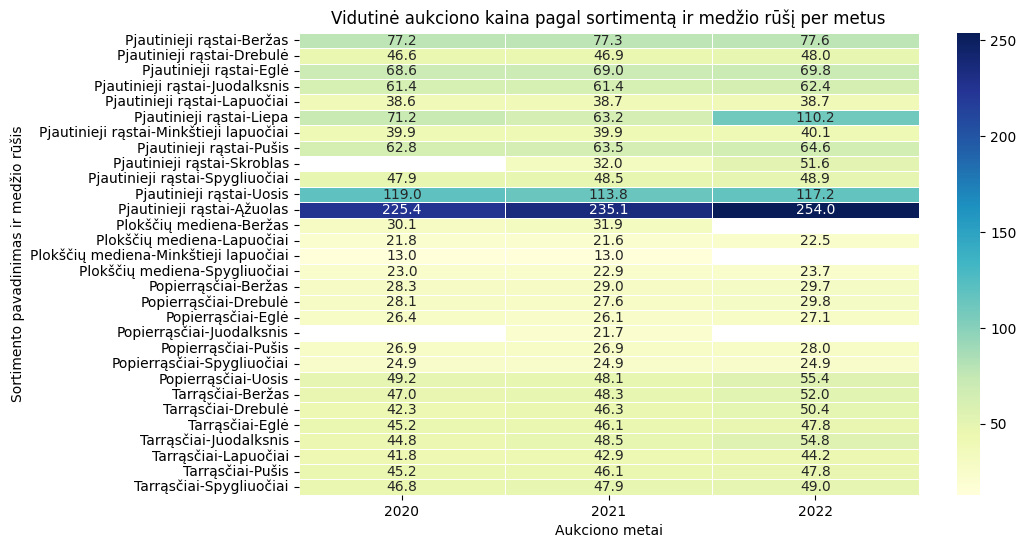

In [15]:
df2 = df.groupby(["Aukciono metai", "Sortimento pavadinimas", "Rušies pavadinimas"])["Kaina aukcione, Eur"].mean().reset_index()

pivot_table = df2.pivot_table(values="Kaina aukcione, Eur",
                             index=["Sortimento pavadinimas", "Rušies pavadinimas"],
                             columns="Aukciono metai",
                             aggfunc="mean")

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt=".1f", linewidths=0.5)
plt.title("Vidutinė aukciono kaina pagal sortimentą ir medžio rūšį per metus")
plt.xlabel("Aukciono metai")
plt.ylabel("Sortimento pavadinimas ir medžio rūšis")
plt.show()

*Uosio ir ąžuolo pjautiniais rąstais prekiaujama už žymiai didesnę kainą, palyginti su kitomis medžių rūšimis. Ši tendencija patvirtina ankstesnį pastebėjimą, kad šios rūšys yra vertinamos kaip aukštos kokybės mediena, todėl jų kaina yra aukštesnė. Tai gali būti dėl didėjusių paklausos šių rūšių medienos, galbūt dėl jų naudojimo brangesnėse gamybos srityse.*
*Kai kurių rūšių, tokių kaip beržas ir minkštieji lapuočiai, paklausa sumažėjo arba išnyko. Tai gali rodyti pokyčius tiekimo grandinėse ir rinkos paklausos pokyčius.*

*Tarrąsčiai rodo nuolatinį kainų kilimą, kas rodo, kad šio sortimento paklausa gali didėti, arba tiekimo grandinės gali patirti tam tikrus apribojimus, dėl kurių tarrąsčių kaina nuolat kyla.*

*Skroblo pjautiniai rąstai pradėti pardavinėti tik nuo 2021 metų, o jų kaina išaugo nuo 32 EUR 2021 metais iki 51,6 EUR 2022 metais. Skroblo pjautinių rąstų kainos augimas ir jų pasirodymas rinkoje gali reikšti naujus poreikius ir augančią paklausą.*

*Liepų kainos: 2020 metais liepų vidutinė kaina buvo 71,2 Eur/m³, 2021 metais nukrito iki 63,2 Eur/m³, o 2022 metais šoktelėjo iki 110,2 Eur/m³. Ši kainų dinamika gali būti susijusi su kintančia paklausa rinkoje ir galimais pasiūlos pokyčiais, tokiuose kaip medienos prieinamumas ar naujos rinkos sąlygos, kurios galėjo turėti įtakos kainų svyravimams.*

*Dauguma kitų rūšių rodo stabilų minimalų kainų augimą be didelių svyravimų, kas gali būti ženklas apie stabilų paklausos ir tiekimo lygį šiose rinkose.*





#### Top 10 pardavėjai pagal sandorių kiekį

In [16]:
top_10_pardavejai = (
    df.groupby("Pardavėjas")["Sandorio kiekis, m3"]
    .sum()
    .reset_index()
    .sort_values(by="Sandorio kiekis, m3", ascending=False)
)

top_10_pardavejai.head(10)

,Pardavėjas,"Sandorio kiekis, m3"
2,Jurbarko regioninis padalinys,6012323
15,VĮ Kazlų Rūdos mokomoji miškų urėdija,4429801
28,VĮ Tauragės miškų urėdija,3399310
38,VĮ Šakių miškų urėdija,3084183
10,VĮ Biržų miškų urėdija,2841667
23,VĮ Panevėžio miškų urėdija,2669083
39,VĮ Šalčininkų miškų urėdija,2603199
16,VĮ Kretingos miškų urėdija,2588415
30,VĮ Trakų miškų urėdija,2578480
40,VĮ Šilutės miškų urėdija,2564758


<function matplotlib.pyplot.show(close=None, block=None)>

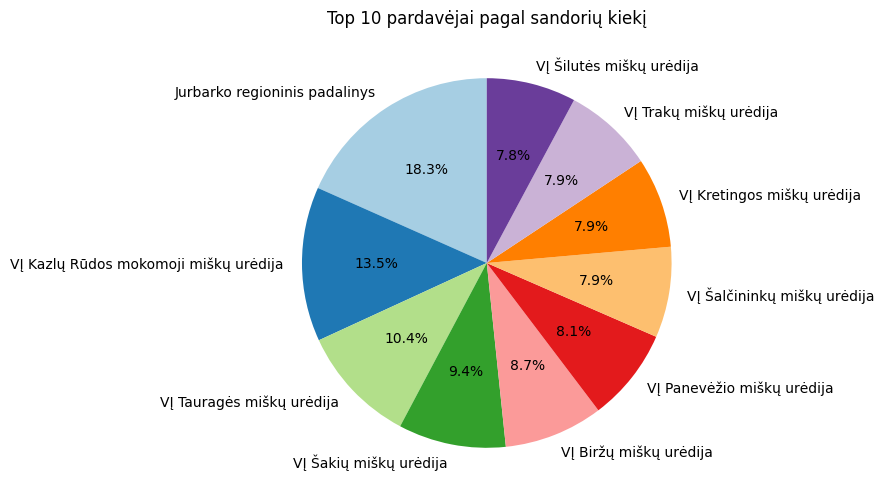

In [17]:
top_10_pardavejai = top_10_pardavejai.head(10)
plt.figure(figsize=(6, 6))
plt.pie(top_10_pardavejai["Sandorio kiekis, m3"], labels=top_10_pardavejai["Pardavėjas"],
            autopct="%1.1f%%", startangle=90, colors=plt.cm.Paired.colors)
plt.title("Top 10 pardavėjai pagal sandorių kiekį")
plt.show

*Aukštos pardavimų apimtys tam tikruose regionuose, pavyzdžiui, Jurbarke, Tauragėje ir Klaipėdoje, gali signalizuoti, kad šiuose regionuose yra didelis medienos ir miškų resursų tiekimas, todėl šios vietovės yra pagrindiniai tiekimo centrai.*

*Tai taip pat gali rodyti, kad šiuose regionuose yra aukštas paklausos lygis dėl vietinių pramonės šakų, kurios naudoja medieną kaip žaliavą, pavyzdžiui, baldų gamyba, statyba arba energijos gamyba*

*Gali būti geriau išvystyta logistikos ir tiekimo grandinė. Tai gali sukurti ekonomiškas sąlygas tiek medienos tiekėjams, tiek pirkėjams, nes trumpesni atstumai ir patogesnės transporto jungtys mažina išlaidas.*

#### Top 10 pirkėjai pagal sandorių kiekį

In [18]:
top_10_pirkejai = (
    df.groupby("Pirkėjas")["Sandorio kiekis, m3"]
    .sum()
    .reset_index()
    .sort_values(by="Sandorio kiekis, m3", ascending=False)
)
top_10_pirkejai.head(10)

,Pirkėjas,"Sandorio kiekis, m3"
241,"UAB ""Targirė""",13922086
152,"UAB ""Juodeliai""",8601091
172,"UAB ""Litforina""",7767167
234,"UAB ""Stora Enso Lietuva""",4195029
125,"UAB ""GKF""",3663888
313,UAB Šilalės mediena,3000334
8,AKZ SIA,2109120
23,IKEA Industry Lietuva,1990714
85,"UAB ""BANGENĖ""",1526057
224,"UAB ""SAKUONA""",1490779


<function matplotlib.pyplot.show(close=None, block=None)>

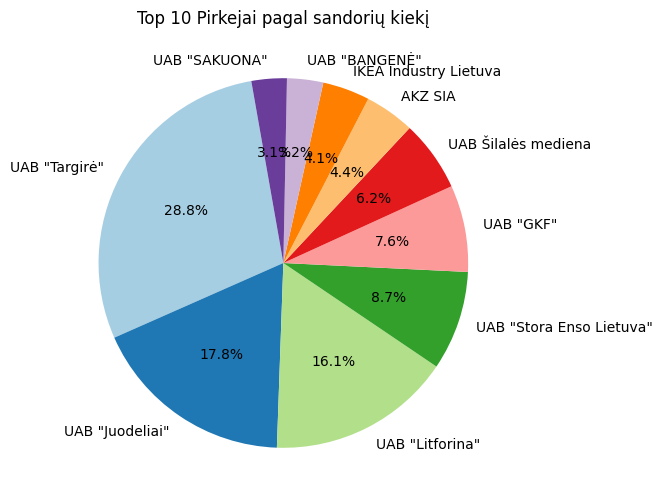

In [19]:
top_10_pirkejai = top_10_pirkejai.head(10)
plt.figure(figsize=(6, 6))
plt.pie(top_10_pirkejai["Sandorio kiekis, m3"], labels=top_10_pirkejai["Pirkėjas"],
            autopct="%1.1f%%", startangle=100, colors=plt.cm.Paired.colors)
plt.title("Top 10 Pirkejai pagal sandorių kiekį")
plt.xticks(rotation=120)
plt.show

*UAB "Stora Enso Lietuva", IKEA Industry Lietuva ir AKZ SIA, patekusios į top 10 pirkėjų sąrašą, rodo, kad tarptautinės korporacijos aktyviai dalyvauja Lietuvos medienos tiekimo rinkoje. Tai liudija, kad Lietuvos medienos tiekėjai pasiekia ne tik vietinę, bet ir užsienio rinką, stiprindami savo pozicijas tarptautiniu mastu.*

*Tuo tarpu UAB "GKF" ir UAB "Šilalės mediena", veikiančios tose pačiose vietovėse, kur vyksta didžiausi pardavimai, gali pasinaudoti stipriu regioniniu buvimu ir mažesniais transportavimo kaštais. Tai leidžia šiems pirkėjams konkurencingai veikti, užtikrinant greitą ir efektyvų tiekimą.*

*Be to, pirmieji penki pirkėjai užima didžiąją dalį sandorių kiekio, kas rodo rinkos koncentraciją ir didžiųjų žaidėjų dominavimą. Tai gali lemti didesnį konkurencinį spaudimą mažesnėms įmonėms, tačiau taip pat suteikia galimybių stipresnėms įmonėms dominuoti ir nustatyti rinkos tendencijas.*

In [20]:
pjautinieji_rastai = df[df["Sortimento pavadinimas"] == "Pjautinieji rąstai"]\
    .groupby(["Pirkėjas", "Sortimento pavadinimas", "Rušies pavadinimas"])["Sandorio kiekis, m3"]\
    .sum().reset_index().sort_values(by="Sandorio kiekis, m3", ascending=False)

#### Top pirkėjai pagal sortimentą

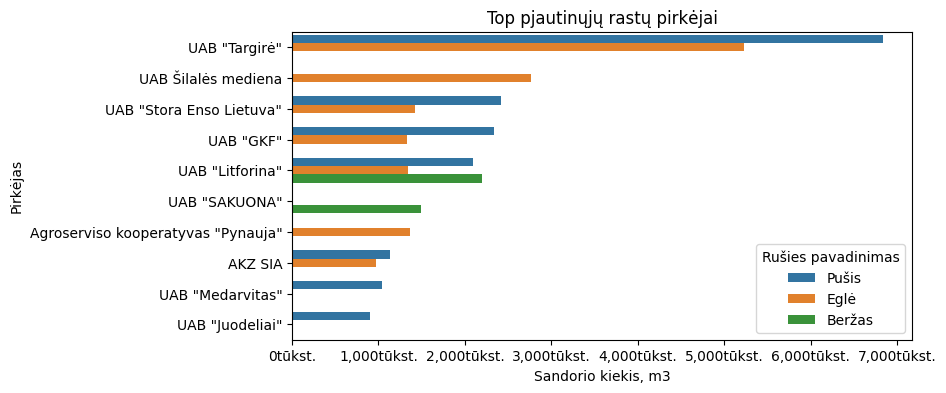

In [21]:
plt.figure(figsize=(8, 4))
sns.barplot(x="Sandorio kiekis, m3", y="Pirkėjas", data=pjautinieji_rastai.head(16), hue="Rušies pavadinimas")
plt.title("Top pjautinųjų rastų pirkėjai")
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{int(x / 1000):,}tūkst."))
plt.show()

In [22]:
popierrasciai = df[df["Sortimento pavadinimas"] == "Popierrąsčiai"]\
    .groupby(["Pirkėjas", "Sortimento pavadinimas", "Rušies pavadinimas"])["Sandorio kiekis, m3"]\
    .sum().reset_index().sort_values(by="Sandorio kiekis, m3", ascending=False)

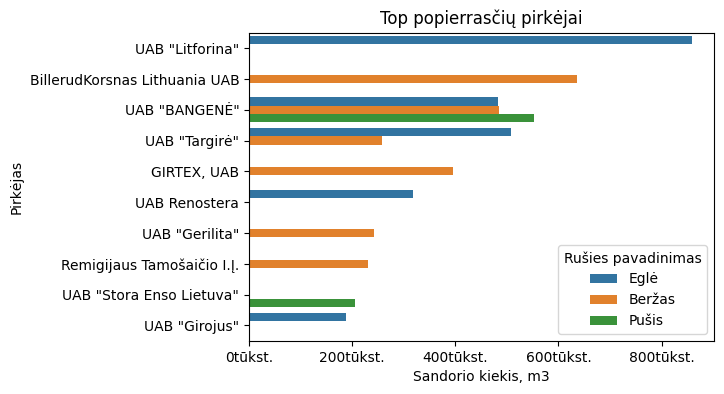

In [23]:
plt.figure(figsize=(6, 4))
sns.barplot(x="Sandorio kiekis, m3", y="Pirkėjas", data=popierrasciai.head(13), hue="Rušies pavadinimas")
plt.title("Top popierrasčių pirkėjai")
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{int(x / 1000):,}tūkst."))
plt.show()

In [24]:
Tarrasciai = df[df["Sortimento pavadinimas"] == "Tarrąsčiai"]\
    .groupby(["Pirkėjas", "Sortimento pavadinimas", "Rušies pavadinimas"])["Sandorio kiekis, m3"]\
    .sum().reset_index().sort_values(by="Sandorio kiekis, m3", ascending=False)

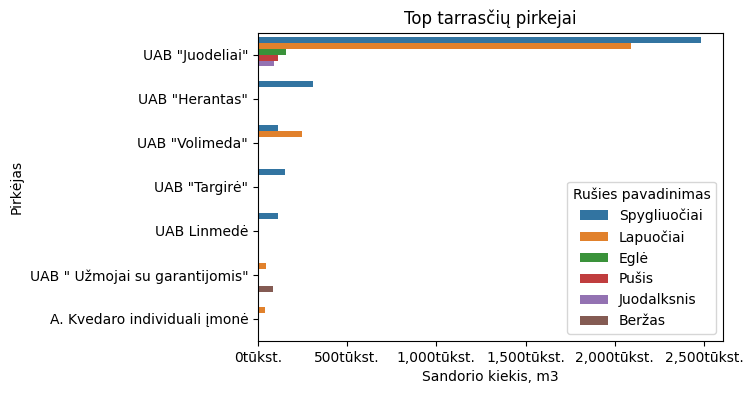

In [25]:
plt.figure(figsize=(6, 4))
sns.barplot(x="Sandorio kiekis, m3", y="Pirkėjas", data=Tarrasciai.head(13), hue="Rušies pavadinimas")
plt.title("Top tarrasčių pirkejai")
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{int(x / 1000):,}tūkst."))
plt.show()


In [26]:
Ploksciu_mediena = df[df["Sortimento pavadinimas"] == "Plokščių mediena"]\
    .groupby(["Pirkėjas", "Rušies pavadinimas", "Sortimento pavadinimas"])["Sandorio kiekis, m3"].sum().reset_index()\
    .sort_values(by="Sandorio kiekis, m3", ascending=False)

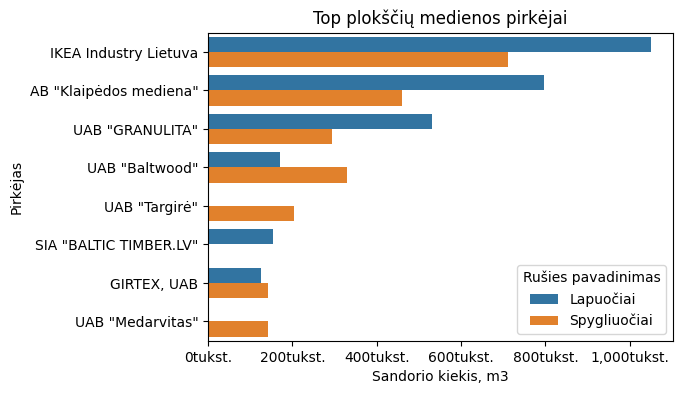

In [27]:
plt.figure(figsize=(6, 4))
sns.barplot(x="Sandorio kiekis, m3", y="Pirkėjas", data=Ploksciu_mediena.head(13), hue="Rušies pavadinimas")
plt.title("Top plokščių medienos pirkėjai")
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{int(x / 1000):,}tukst."))
plt.show()

*Atskirai atvaizdavus top pirkėjus pagal kiekvieną sortimentą, galima iš karto pastebėti, kad rinkoje egzistuoja aiškūs lyderiai, kurie dominuoja tam tikruose segmentuose: Matoma, kad tiek pjautinių rąstų, tiek tarrąščių sortimentuose vienas pirkėjas užima didžiausią rinkos dalį. Tai rodo, kad šie pirkėjai yra labai stiprūs ir turi reikšmingą įtaką visoje tiekimo grandinėje.* 

*Dominuojančių pirkėjų buvimas gali turėti didelę įtaką kainodarai, nes vieno ar kelių pirkėjų užvaldyta didelė rinkos dalis leidžia jiems daryti įtaką kainoms ir sąlygoms.*

*Apibendrinant, šios įžvalgos rodo, kad Lietuvos medienos rinkoje yra keli aiškūs lyderiai, kurie dominuoja savo segmentuose, o tai suteikia rinkai stabilumo, bet kartu ir iššūkių mažesniems žaidėjams. Tokia rinkos struktūra gali skatinti ilgalaikį bendradarbiavimą tarp didžiųjų tiekėjų ir pirkėjų, tačiau gali riboti konkurencijos galimybes tam tikruose segmentuose.*

#### Vizualizacija - ryšiai TOP 10 pardavėjų su TOP 10 pirkėjų

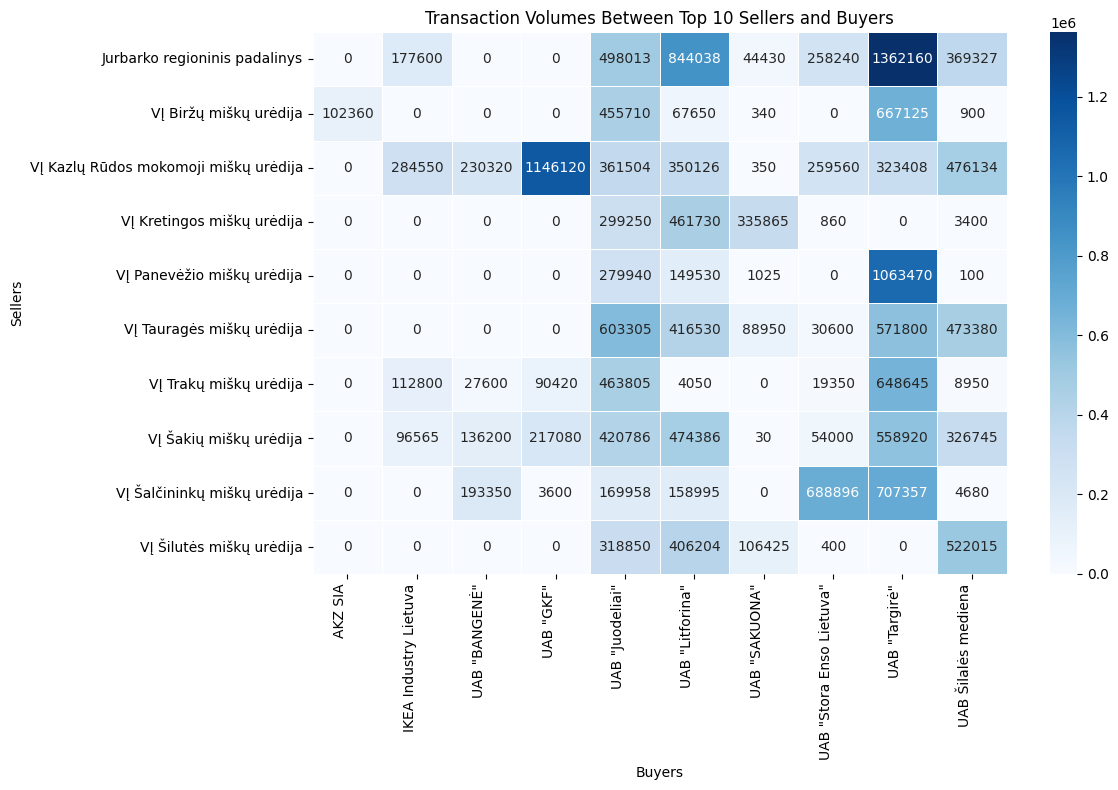

In [28]:
top_10_pardavejai = (
    df.groupby("Pardavėjas")["Sandorio kiekis, m3"]
    .sum()
    .reset_index()
    .sort_values(by="Sandorio kiekis, m3", ascending=False)
    .head(10)
)

top_10_pirkejai = (
    df.groupby("Pirkėjas")["Sandorio kiekis, m3"]
    .sum()
    .reset_index()
    .sort_values(by="Sandorio kiekis, m3", ascending=False)
    .head(10)
)

filtered_df = df[
    df["Pardavėjas"].isin(top_10_pardavejai["Pardavėjas"]) & 
    df["Pirkėjas"].isin(top_10_pirkejai["Pirkėjas"])
]

pivot_table = filtered_df.pivot_table(
    index="Pardavėjas",
    columns="Pirkėjas",
    values="Sandorio kiekis, m3",
    aggfunc="sum",
    fill_value=0
)

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="Blues", linewidths=0.5)
plt.title("Transaction Volumes Between Top 10 Sellers and Buyers")
plt.xlabel("Buyers")
plt.ylabel("Sellers")
plt.xticks(rotation=90, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

*Akivaizdu, kad regionai turi įtakos ryšiams tarp pirkėjų ir pardavėjų. Didžiausi kiekių pardavimai vyksta tarp įmonių ir tiekėjų, kurie yra geografiškai artimi arba netgi toje pačioje vietovėje. Tai gali būti susiję su mažesnėmis transportavimo sąnaudomis, greitesniu prekių tiekimu ir efektyvesniu logistikos procesu. Tokie ryšiai leidžia įmonėms optimizuoti tiekimo grandines ir sumažinti papildomas kaštų rizikas, susijusias su ilgesniu atstumu tarp tiekimo šaltinio ir vartotojo.*
*Įmonės, tokios kaip „Silalės Mediena“, „Juodeliai“ ir UAB „Litforina“, demonstruoja strategiją, siekdamos mažinti tiekimo riziką. Bendradarbiaudamos su daugeliu tiekėjų, jos užtikrina tiekimo grandinės stabilumą, nes pasiruošia galimiems tiekimo sutrikimams ar neprognozuojamoms kainų svyravimams.*

#### Išvados ir galimi sprendimai

*Išanalizavus sandorių kiekio pasiskirstymą matome, kad pjautiniai rąstai dominuoja rinkoje tiek pagal sandorių apimtį, tiek pagal stabilumą. Jų paklausa išlieka didžiausia ir pastovi, nes pokyčiai sandorių kiekyje yra minimalūs.*

*Sprendimas: Įmonės turėtų susitelkti į pjautinių rąstų tiekimo ir gamybos optimizavimą, kad galėtų patenkinti nuolatinį ir augantį šio produkto poreikį. Be to, gali būti verta toliau tyrinėti specifines medienos rūšis (pvz., ąžuolas ir uosis), kurios atneša didesnes pajamas.*

*Stabili paklausa visiems sortimentams:*
*Nors įvairių sortimentų, tokių kaip plokščių mediena, popierrąsčiai ir tarrąsčiai, sandorių kiekio pokyčiai per trejus metus nėra reikšmingi, tai rodo, kad šių produktų paklausa rinkoje išlieka stabilia.*

*Sprendimas: Atsižvelgiant į stabilų šių produktų poreikį, įmonės gali tikėtis nuoseklių pardavimų ir galbūt netgi turėtų ieškoti galimybių sustiprinti šių produktų pristatymą rinkai, kad patenkintų nuolatinį poreikį.*

*Kainų pasiskirstymas ir tendencijos:*
*Kainų pasiskirstymas yra labiau koncentruotas aplink vidutinę kainą, tačiau tam tikri sandoriai pjautiniuose rąstuose išsiskiria žymiai brangesniais sandoriais. Tai rodo, kad tam tikros medienos rūšys yra vertinamos kaip aukštesnės kokybės ir jų kaina aukcionuose yra didesnė.*

*Sprendimas: Įmonės turėtų analizuoti, kurios medienos rūšys (pvz., ąžuolas ir uosis) pasiekia aukštesnes kainas, ir tai gali būti naudingas informacijos šaltinis ateities kainodaros strategijoms. Taip pat verta įvertinti galimybę papildomai pasiūlyti šias rūšis, jei jų paklausa auga.*

*Uosis ir ąžuolas išsiskiria aukštomis kainomis, kas rodo šių rūšių vertę ir galimą didesnę paklausą. Tai galbūt yra susiję su šių medienos rūšių naudojimu aukštesnės vertės pramonėje (baldų gamyba, prabangios statybos ir kt.).*

*Sprendimas: Šių rūšių medienos tiekimas turėtų būti didinamas, kad būtų patenkintas augantis poreikis. Be to, įmonės galėtų apsvarstyti galimybę kurti specializuotas paslaugas ar produktus, orientuotus į aukštesnės kokybės medieną.*

*Tarrąsčiai rodo nuolatinį kainų kilimą, kas gali rodyti augančią paklausą arba tiekimo apribojimus. Tai gali būti ženklas apie pokyčius rinkoje.
Sprendimas: Stebėti tiekimo grandines ir ieškoti būdų, kaip sumažinti galimus tiekimo apribojimus. Tai galėtų padėti stabilizuoti kainas ir užtikrinti, kad paklausa būtų patenkinta laiku.*

*Skroblo pjautiniai rąstai pradėti pardavinėti tik nuo 2021 metų, tačiau jų kaina išaugo, rodyti augančią paklausą ir galbūt naujus rinkos poreikius.
Sprendimas: Tai rodo, kad naujos medienos rūšys gali sukelti naujus poreikius, ir įmonės turėtų apsvarstyti galimybę išplėsti savo tiekimo asortimentą, įtraukiant naujas medienos rūšis, kurios gali būti paklausios ateityje.*

*Kitų rūšių tendencijos:*
*Dauguma kitų rūšių rodo stabilų minimalų kainų augimą be didelių svyravimų, kas rodo, kad paklausa ir tiekimas šiose rinkose išlieka stabilūs.*